In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix,f1_score,classification_report
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# import data
# load data
data = pd.read_csv('auto_imports_1.csv')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
data.shape

(201, 26)

In [4]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [5]:
# data preprocessing
# checking value count and info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [6]:
# checking null value in dataset
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [7]:
data.size

5226

In [8]:
# symboling value counts
data['symboling'].value_counts()

 0    65
 1    52
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [9]:
# make value counts
data['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
chevrolet         3
jaguar            3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64

In [10]:
# fuel-type value counts
data['fuel-type'].value_counts()

gas       181
diesel     20
Name: fuel-type, dtype: int64

In [11]:
# aspiration value counts
data['aspiration'].value_counts()

std      165
turbo     36
Name: aspiration, dtype: int64

In [12]:
# num-of-doors value counts
data['num-of-doors'].value_counts()

four    113
two      86
?         2
Name: num-of-doors, dtype: int64

In [13]:
# body-style value counts
data['body-style'].value_counts()

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [14]:
# drive-wheels value counts
data['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [15]:
# engine-location value counts
data['engine-location'].value_counts()

front    198
rear       3
Name: engine-location, dtype: int64

In [16]:
# fuel-system' value counts
data['fuel-system'].value_counts()

mpfi    92
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

In [17]:
# num-of-cylinders value counts
data['num-of-cylinders'].value_counts()

four      157
six        24
five       10
eight       4
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [18]:
# checking correlation of day data
corr = data.corr()
corr['price'].sort_values(ascending = False)

price                1.000000
engine-size          0.872335
curb-weight          0.834415
width                0.751265
length               0.690628
wheel-base           0.584642
height               0.135486
compression-ratio    0.071107
symboling           -0.082391
city-mpg            -0.686571
highway-mpg         -0.704692
Name: price, dtype: float64

# Visulization

array([[<AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'wheel-base'}>,
        <AxesSubplot:title={'center':'length'}>],
       [<AxesSubplot:title={'center':'width'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'curb-weight'}>],
       [<AxesSubplot:title={'center':'engine-size'}>,
        <AxesSubplot:title={'center':'compression-ratio'}>,
        <AxesSubplot:title={'center':'city-mpg'}>],
       [<AxesSubplot:title={'center':'highway-mpg'}>,
        <AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

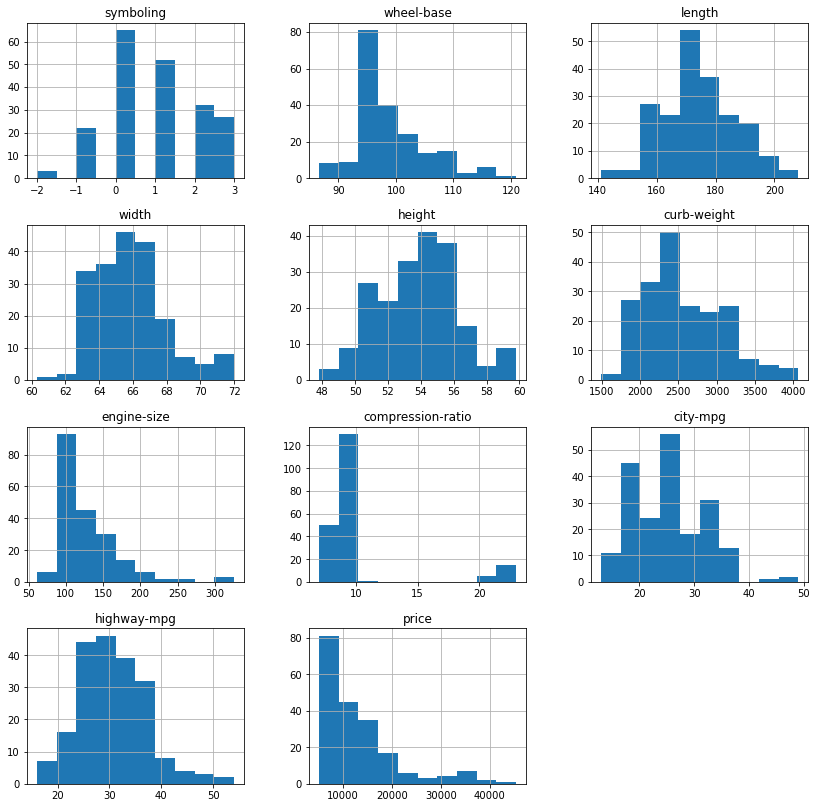

In [19]:
data.hist(figsize=(14,14))

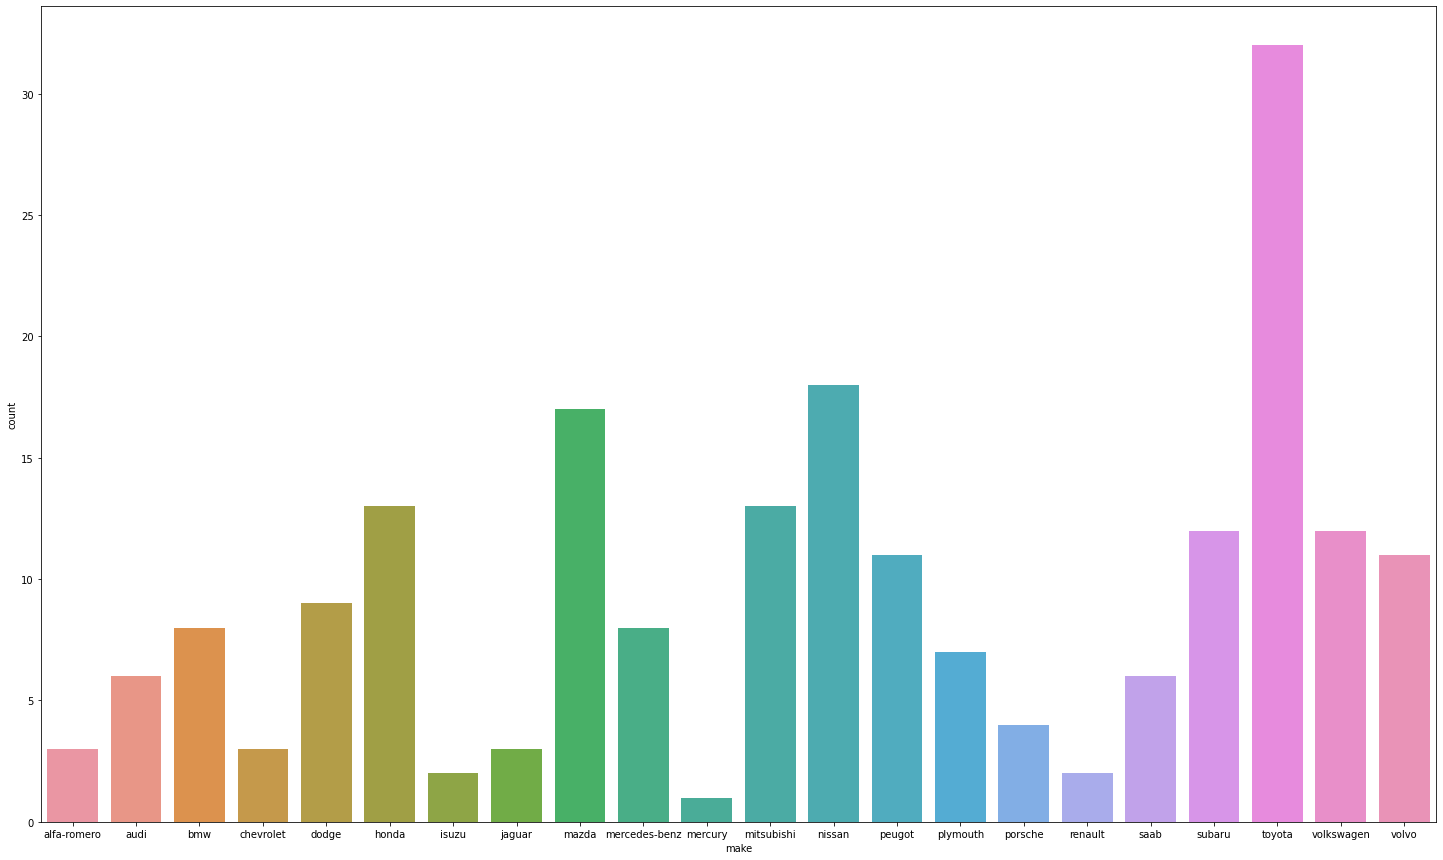

In [20]:
fig, ax = plt.subplots(figsize=(25,15))
sns.countplot(data['make'])
plt.show()

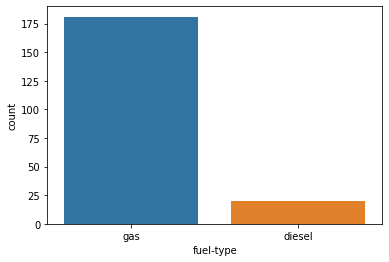

In [21]:
sns.countplot(data['fuel-type'])
plt.show()

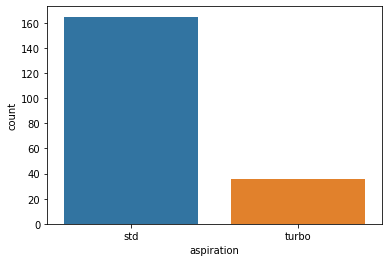

In [22]:
sns.countplot(data['aspiration'])
plt.show()

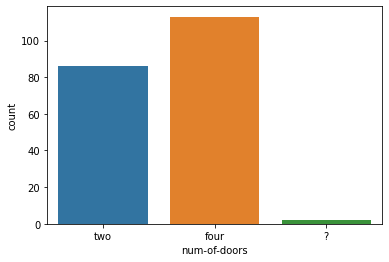

In [23]:
sns.countplot(data['num-of-doors'])
plt.show()

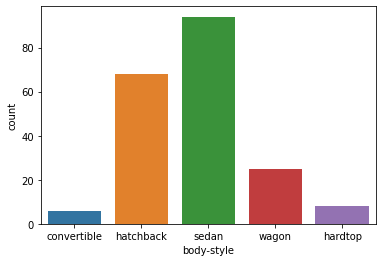

In [24]:
sns.countplot(data['body-style'])
plt.show()

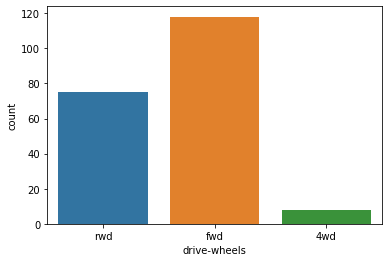

In [25]:
sns.countplot(data['drive-wheels'])
plt.show()

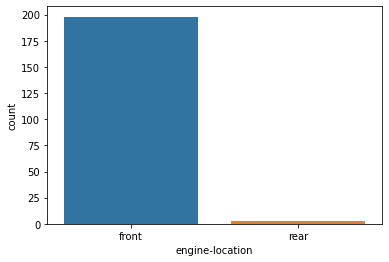

In [26]:
sns.countplot(data['engine-location'])
plt.show()

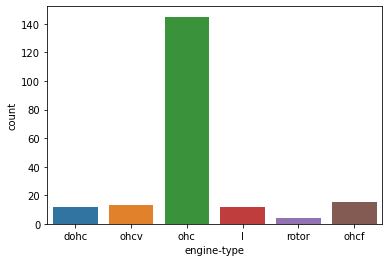

In [27]:
sns.countplot(data['engine-type'])
plt.show()

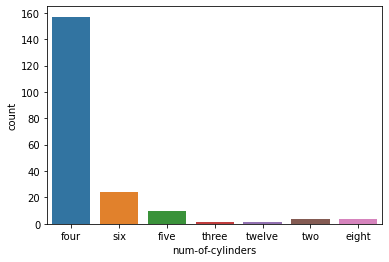

In [28]:
sns.countplot(data['num-of-cylinders'])
plt.show()

<AxesSubplot:xlabel='make', ylabel='price'>

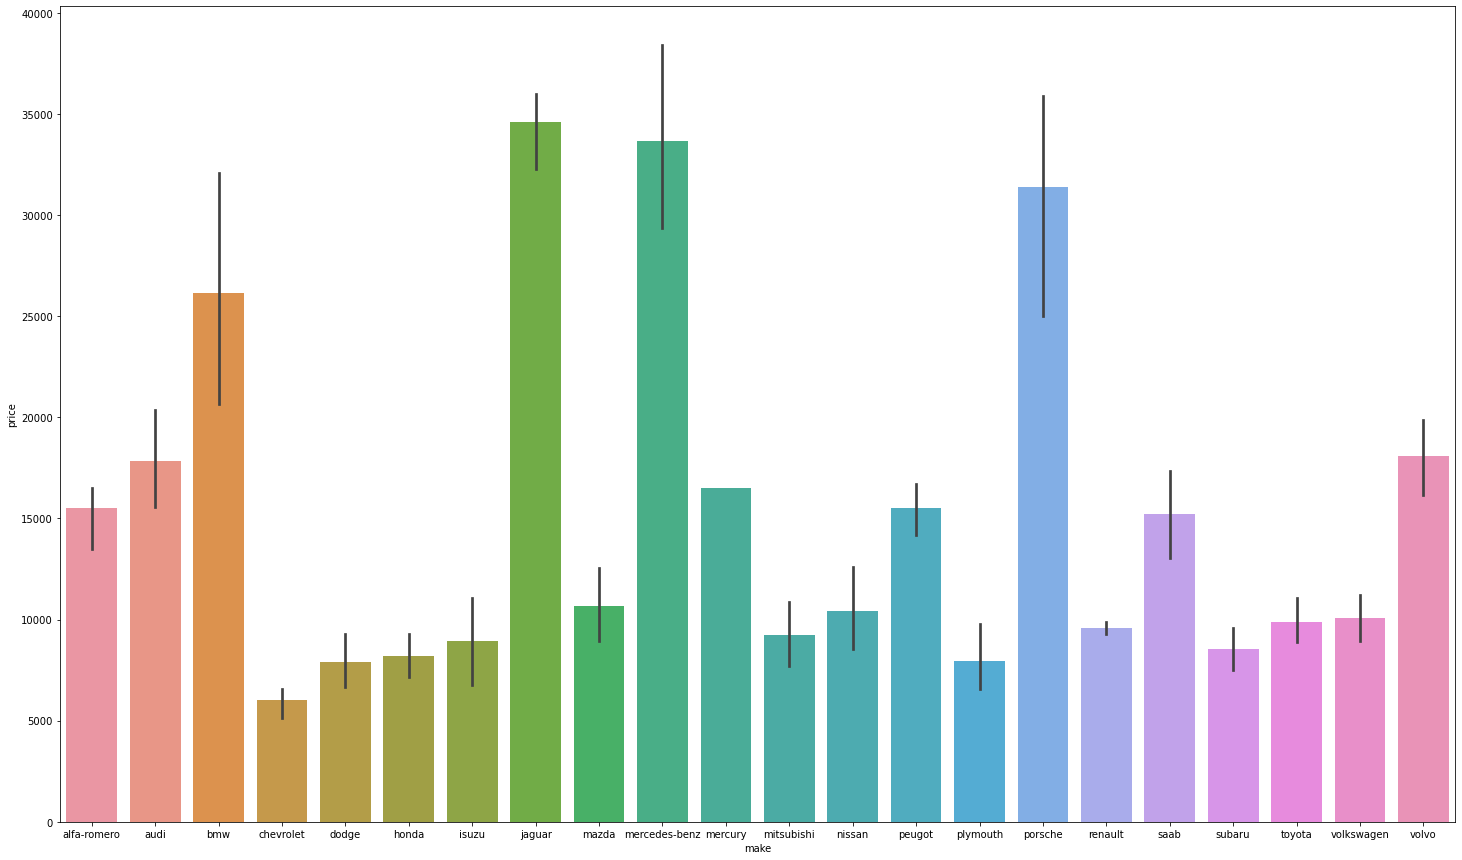

In [29]:

fig, ax = plt.subplots(figsize=(25,15))
sns.barplot(data['make'],data['price'])

<AxesSubplot:xlabel='body-style', ylabel='price'>

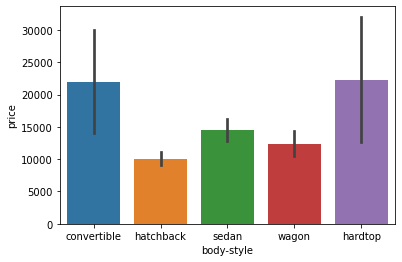

In [30]:
sns.barplot(data['body-style'],data['price'])

<AxesSubplot:xlabel='engine-location', ylabel='price'>

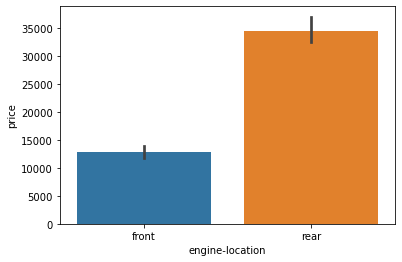

In [31]:
sns.barplot(data['engine-location'],data['price'])

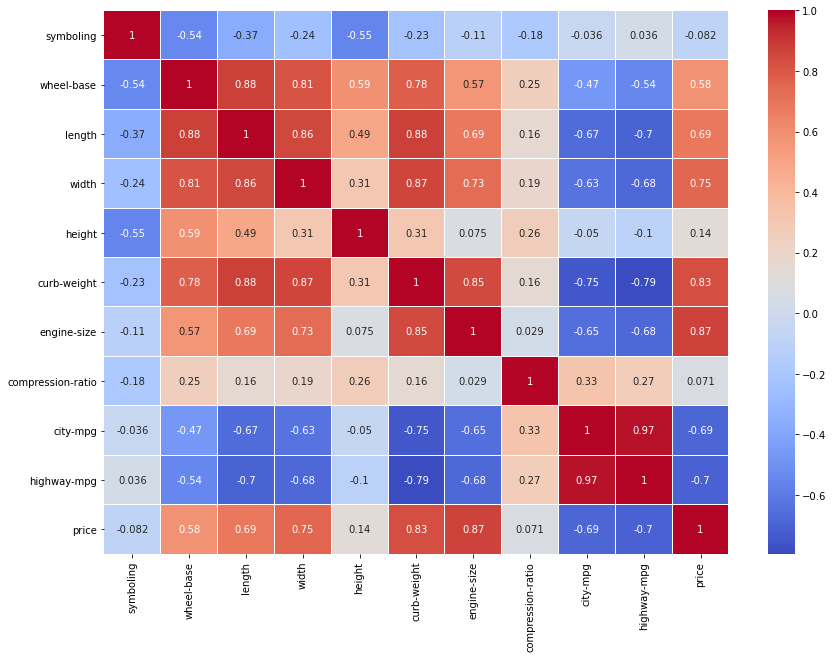

In [32]:
# Heatmap
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), linewidths=.01, annot = True, cmap='coolwarm')
plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in data:
    if data[x].dtypes=='object':
        data[x] = le.fit_transform(data[x])

In [34]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,51,0,1,0,2,0,2,0,88.6,...,130,5,23,4,9.0,5,10,21,27,13495
1,3,51,0,1,0,2,0,2,0,88.6,...,130,5,23,4,9.0,5,10,21,27,16500
2,1,51,0,1,0,2,2,2,0,94.5,...,152,5,1,27,9.0,20,10,19,26,16500
3,2,27,1,1,0,1,3,1,0,99.8,...,109,5,13,24,10.0,2,16,24,30,13950
4,2,27,1,1,0,1,3,0,0,99.4,...,136,5,13,24,8.0,8,16,18,22,17450


# Data preprocessing

In [35]:
# train_test_split

x = data.drop(columns=['normalized-losses'],axis=1)
y =data['price']

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [37]:
x_train.shape

(160, 25)

In [38]:
x_test.shape

(41, 25)

In [39]:
# Linear regression
model = LinearRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
r2_score(y_test,y_predict)

1.0

In [40]:
y_test

59     10245
5      15250
20      5572
127     9895
52     10945
19      6575
163     8449
55     15645
69     35056
2      16500
98     13499
10     16925
75      6669
136     7603
171     9988
63     18344
109    16900
78      8499
111    17075
116     7957
154     7898
131    15510
61     11245
87      7099
102    19699
179     7975
155     7788
1      16500
47      5195
173    11248
160     8238
39     10295
76      7689
91      7299
35      7295
195    18950
194    18420
142     7463
46     36000
175    15998
191    13415
Name: price, dtype: int64

In [41]:
y_predict

array([10245., 15250.,  5572.,  9895., 10945.,  6575.,  8449., 15645.,
       35056., 16500., 13499., 16925.,  6669.,  7603.,  9988., 18344.,
       16900.,  8499., 17075.,  7957.,  7898., 15510., 11245.,  7099.,
       19699.,  7975.,  7788., 16500.,  5195., 11248.,  8238., 10295.,
        7689.,  7299.,  7295., 18950., 18420.,  7463., 36000., 15998.,
       13415.])

In [42]:
pd.crosstab(y_test,y_predict)


col_0,5195.0,5572.0,6575.0,6669.0,7099.0,7295.0,7299.0,7463.0,7603.0,7689.0,...,16500.0,16900.0,16925.0,17075.0,18344.0,18420.0,18950.0,19699.0,35056.0,36000.0
price,,,,,,,,,,,,,,,,,,,,,
5195,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5572,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6575,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6669,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7099,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7295,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7299,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7463,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7603,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# decision tree model
model = DecisionTreeRegressor()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.0975609756097561

In [44]:
pd.crosstab(y_test,y_predict)

col_0,5348.0,5572.0,6529.0,6692.0,7126.0,7295.0,7349.0,7499.0,7609.0,7738.0,...,13845.0,14869.0,15690.0,15985.0,16503.0,16845.0,18620.0,18920.0,36880.0,37028.0
price,,,,,,,,,,,,,,,,,,,,,
5195,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5572,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6575,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6669,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7099,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7295,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7299,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7463,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7603,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
confusion_matrix(y_test,y_predict)

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [46]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

      5195.0       0.00      0.00      0.00         1
      5348.0       0.00      0.00      0.00         0
      5572.0       1.00      1.00      1.00         1
      6529.0       0.00      0.00      0.00         0
      6575.0       0.00      0.00      0.00         1
      6669.0       0.00      0.00      0.00         1
      6692.0       0.00      0.00      0.00         0
      7099.0       0.00      0.00      0.00         1
      7126.0       0.00      0.00      0.00         0
      7295.0       1.00      1.00      1.00         1
      7299.0       0.00      0.00      0.00         1
      7349.0       0.00      0.00      0.00         0
      7463.0       0.00      0.00      0.00         1
      7499.0       0.00      0.00      0.00         0
      7603.0       0.00      0.00      0.00         1
      7609.0       0.00      0.00      0.00         0
      7689.0       0.00      0.00      0.00         1
      7738.0       0.00    

In [47]:
# RandomForestRegressor 
model = RandomForestRegressor()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
r2_score(y_test,y_predict)

0.9987763526154293

In [48]:
pd.crosstab(y_test,y_predict)

col_0,5366.60,5499.07,6549.49,6656.64,7164.73,7306.27,7346.91,7440.25,7565.49,7702.41,...,16671.75,16727.76,16822.96,17158.67,18241.17,18412.94,18723.67,18914.95,35363.11,36977.89
price,,,,,,,,,,,,,,,,,,,,,
5195,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5572,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6575,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6669,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7099,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7295,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7299,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7463,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7603,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# MLPRegressor
model =MLPRegressor(hidden_layer_sizes=(100),random_state=10)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
r2_score(y_test,y_predict)

0.9955829124632247

# Conclusion

In [50]:
#Dataframe for models
models = {"Linear Regression": LinearRegression(),
          "Random Forest": RandomForestRegressor(),
          "DecisionTree": DecisionTreeRegressor(),
          "MLPRegressor": MLPRegressor()}
          

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [51]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Linear Regression': 1.0,
 'Random Forest': 0.9985495865823613,
 'DecisionTree': 0.99868399738341,
 'MLPRegressor': 0.9910134432253848}

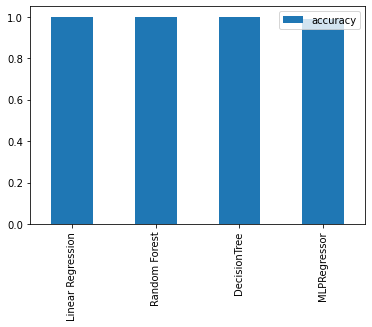

In [52]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();  